# Introduction

The Ultimate Fighting Championship (UFC) is an intense international competition where two fighters compete in mixed martial arts. Commonly before events, there is a lot of pre-fight talk where commentators compare fighters' personalities, fighting styles, and certain behaviors to hopefully place their accurate prediction. Countless people on Twitter, YouTube, and other social media also host their own livestreams and takes of their view.

Inside the octagon, people commonly say "anything can happen", suggesting the outcome between two fighters despite predictions can be hardly known. In this project, we would like to find the truth to the statement and hopefully identify certain patterns or behaviors to aid in UFC predictions.

We will hopefully train a model when provided the following features: `stance`, `height`, `reach`, `weight`, and `age` can accurately predict a favorite.



In [529]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(0)
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [530]:
# Import data
file = open("dataset/data.csv")
df = pd.read_csv(file)
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


# Unsupervised Analysis

We will first take a look at the dataset to identify any missing values, as well as the features we are provided. Based on our desired goal of predicting who wins a fight, our target value is the "Winner".

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Columns: 144 entries, R_fighter to R_age
dtypes: bool(1), float64(106), int64(28), object(9)
memory usage: 6.6+ MB


In [532]:
df.shape

(6012, 144)

We have 6012 entries with 144 features.

In [533]:
for i, j in zip(df.columns, df.isnull().sum()):
    print(i, j)

R_fighter 0
B_fighter 0
Referee 32
date 0
location 0
Winner 0
title_bout 0
weight_class 0
B_avg_KD 1427
B_avg_opp_KD 1427
B_avg_SIG_STR_pct 1427
B_avg_opp_SIG_STR_pct 1427
B_avg_TD_pct 1427
B_avg_opp_TD_pct 1427
B_avg_SUB_ATT 1427
B_avg_opp_SUB_ATT 1427
B_avg_REV 1427
B_avg_opp_REV 1427
B_avg_SIG_STR_att 1427
B_avg_SIG_STR_landed 1427
B_avg_opp_SIG_STR_att 1427
B_avg_opp_SIG_STR_landed 1427
B_avg_TOTAL_STR_att 1427
B_avg_TOTAL_STR_landed 1427
B_avg_opp_TOTAL_STR_att 1427
B_avg_opp_TOTAL_STR_landed 1427
B_avg_TD_att 1427
B_avg_TD_landed 1427
B_avg_opp_TD_att 1427
B_avg_opp_TD_landed 1427
B_avg_HEAD_att 1427
B_avg_HEAD_landed 1427
B_avg_opp_HEAD_att 1427
B_avg_opp_HEAD_landed 1427
B_avg_BODY_att 1427
B_avg_BODY_landed 1427
B_avg_opp_BODY_att 1427
B_avg_opp_BODY_landed 1427
B_avg_LEG_att 1427
B_avg_LEG_landed 1427
B_avg_opp_LEG_att 1427
B_avg_opp_LEG_landed 1427
B_avg_DISTANCE_att 1427
B_avg_DISTANCE_landed 1427
B_avg_opp_DISTANCE_att 1427
B_avg_opp_DISTANCE_landed 1427
B_avg_CLINCH_att 1

We will take a look at the features and some of their characteristics. We will start with categorical features.

## Categorical Features

In [534]:
categorical_features = df.select_dtypes(include=[np.object])
for col in categorical_features.columns:
    print(col)

R_fighter
B_fighter
Referee
date
location
Winner
weight_class
B_Stance
R_Stance


Let's take a look at the `weight_class` and `Stance` distributions for the dataset.

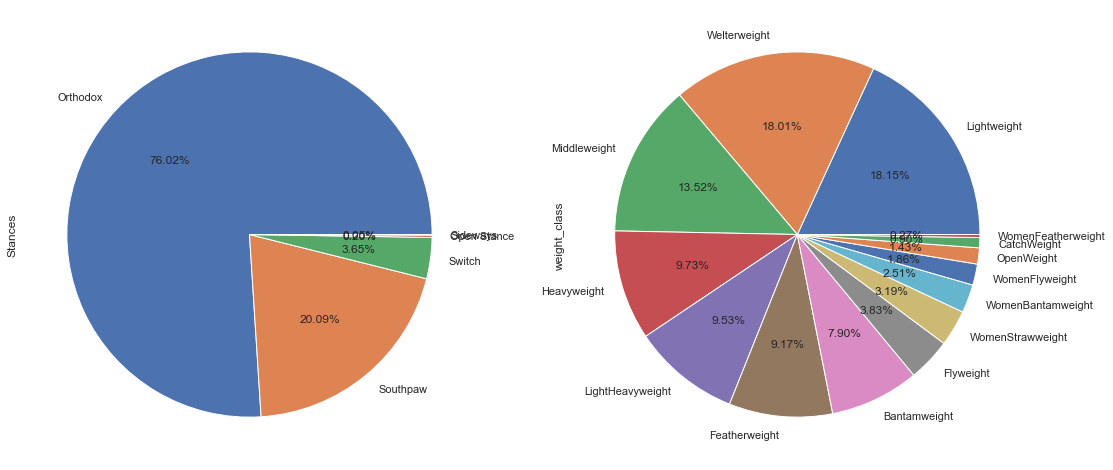

In [535]:
fig, a = plt.subplots(ncols=2, figsize=(18, 9))

stances = pd.concat([df['R_Stance'], df['B_Stance']], axis=0) # combining all stances, double length of dataset
weights = df['weight_class']

stances.value_counts().plot(kind='pie', autopct='%1.2f%%', ax=a[0])
a[0].set_ylabel('Stances')

weights.value_counts().plot(kind='pie', autopct='%1.2f%%', ax=a[1])

plt.show()

`weight_class` at a glance seems quite evenly distributed. Using the feature as is should produce equal results in regards to the dataset. However because `weight_class` is an overall feature that doesn't create a difference between two fights, we may remove it entirely to reduce dimensionality.

`Stance` on the other hand seems to have a majority being `Orthodox`. Though in this case each fight has two stances, it may be worth creating a new feature to generate differences in stances.

## Numerical Features

In [536]:
numerical_features = df.select_dtypes(include=[np.number])
for col in numerical_features.columns:
    print(col)

B_avg_KD
B_avg_opp_KD
B_avg_SIG_STR_pct
B_avg_opp_SIG_STR_pct
B_avg_TD_pct
B_avg_opp_TD_pct
B_avg_SUB_ATT
B_avg_opp_SUB_ATT
B_avg_REV
B_avg_opp_REV
B_avg_SIG_STR_att
B_avg_SIG_STR_landed
B_avg_opp_SIG_STR_att
B_avg_opp_SIG_STR_landed
B_avg_TOTAL_STR_att
B_avg_TOTAL_STR_landed
B_avg_opp_TOTAL_STR_att
B_avg_opp_TOTAL_STR_landed
B_avg_TD_att
B_avg_TD_landed
B_avg_opp_TD_att
B_avg_opp_TD_landed
B_avg_HEAD_att
B_avg_HEAD_landed
B_avg_opp_HEAD_att
B_avg_opp_HEAD_landed
B_avg_BODY_att
B_avg_BODY_landed
B_avg_opp_BODY_att
B_avg_opp_BODY_landed
B_avg_LEG_att
B_avg_LEG_landed
B_avg_opp_LEG_att
B_avg_opp_LEG_landed
B_avg_DISTANCE_att
B_avg_DISTANCE_landed
B_avg_opp_DISTANCE_att
B_avg_opp_DISTANCE_landed
B_avg_CLINCH_att
B_avg_CLINCH_landed
B_avg_opp_CLINCH_att
B_avg_opp_CLINCH_landed
B_avg_GROUND_att
B_avg_GROUND_landed
B_avg_opp_GROUND_att
B_avg_opp_GROUND_landed
B_avg_CTRL_time(seconds)
B_avg_opp_CTRL_time(seconds)
B_total_time_fought(seconds)
B_total_rounds_fought
B_total_title_bouts
B_current

In [537]:
print(df)

          R_fighter           B_fighter        Referee        date  \
0      Adrian Yanez       Gustavo Lopez  Chris Tognoni  2021-03-20   
1      Trevin Giles       Roman Dolidze      Herb Dean  2021-03-20   
2       Tai Tuivasa     Harry Hunsucker      Herb Dean  2021-03-20   
3     Cheyanne Buys   Montserrat Conejo     Mark Smith  2021-03-20   
4     Marion Reneau       Macy Chiasson     Mark Smith  2021-03-20   
...             ...                 ...            ...         ...   
6007  Remco Pardoel  Alberta Cerra Leon  John McCarthy  1994-03-11   
6008   Orlando Wiet    Robert Lucarelli  John McCarthy  1994-03-11   
6009  Johnny Rhodes       David Levicki  John McCarthy  1994-03-11   
6010  Patrick Smith          Ray Wizard  John McCarthy  1994-03-11   
6011   Scott Morris      Sean Daugherty  John McCarthy  1994-03-11   

                    location Winner  title_bout       weight_class  B_avg_KD  \
0     Las Vegas, Nevada, USA    Red       False       Bantamweight     0.000   

In [538]:
wlArray = df.filter(['R_wins', 'R_losses', 'B_wins', 'B_losses'])

wlArray['R_losses'] = wlArray['R_losses'].replace(0,1)
wlArray['B_losses'] = wlArray['B_losses'].replace(0,1)

df['R_wlr'] = wlArray['R_wins']/wlArray['R_losses']
df['B_wlr'] = wlArray['B_wins']/wlArray['B_losses']
df['R_winDiff'] = df['R_wins'] - df['R_losses']
df['B_winDiff'] = df['B_wins'] - df['B_losses']

print(wlArray)

print(df['R_wlr'])
print(df['B_wlr'])


      R_wins  R_losses  B_wins  B_losses
0          1         1       1         1
1          4         2       2         1
2          4         3       0         1
3          0         1       0         1
4          5         6       4         1
...      ...       ...     ...       ...
6007       0         1       0         1
6008       0         1       0         1
6009       0         1       0         1
6010       0         1       0         1
6011       0         1       0         1

[6012 rows x 4 columns]
0       1.000000
1       2.000000
2       1.333333
3       0.000000
4       0.833333
          ...   
6007    0.000000
6008    0.000000
6009    0.000000
6010    0.000000
6011    0.000000
Name: R_wlr, Length: 6012, dtype: float64
0       1.0
1       2.0
2       0.0
3       0.0
4       4.0
       ... 
6007    0.0
6008    0.0
6009    0.0
6010    0.0
6011    0.0
Name: B_wlr, Length: 6012, dtype: float64


We will again combine the red and blue columns to get a general view of all the data.

In [539]:
heights = pd.concat([df['R_Height_cms'], df['B_Height_cms']], axis=0)
weights = pd.concat([df['R_Weight_lbs'], df['B_Weight_lbs']], axis=0)
reaches = pd.concat([df['R_Reach_cms'], df['B_Reach_cms']], axis=0)
wlr = pd.concat([df['R_wlr'], df['B_wlr']], axis=0)
ages = pd.concat([df['R_age'], df['B_age']], axis=0)
win_streaks = pd.concat([df['R_current_win_streak'], df['B_current_win_streak']], axis=0)

numerical_features = pd.concat([heights, weights, reaches, ages, win_streaks, wlr], axis=1)
numerical_features.columns = ["Heights", "Weights", "Reaches", "Ages", "Win Streaks", "Win Loss Ratio"]
numerical_features.describe()

,Heights,Weights,Reaches,Ages,Win Streaks,Win Loss Ratio
count,12010.000000,12014.000000,10727.000000,11789.000000,12024.000000,12024.000000
mean,178.971445,170.638588,183.403060,29.447112,1.130988,1.477975
std,8.761262,36.304720,10.472002,4.118991,1.624756,1.614409
min,152.400000,115.000000,147.320000,18.000000,0.000000,0.000000
25%,172.720000,145.000000,177.800000,26.000000,0.000000,0.000000
50%,180.340000,170.000000,182.880000,29.000000,1.000000,1.000000
75%,185.420000,185.000000,190.500000,32.000000,2.000000,2.000000
max,210.820000,770.000000,213.360000,51.000000,16.000000,16.000000


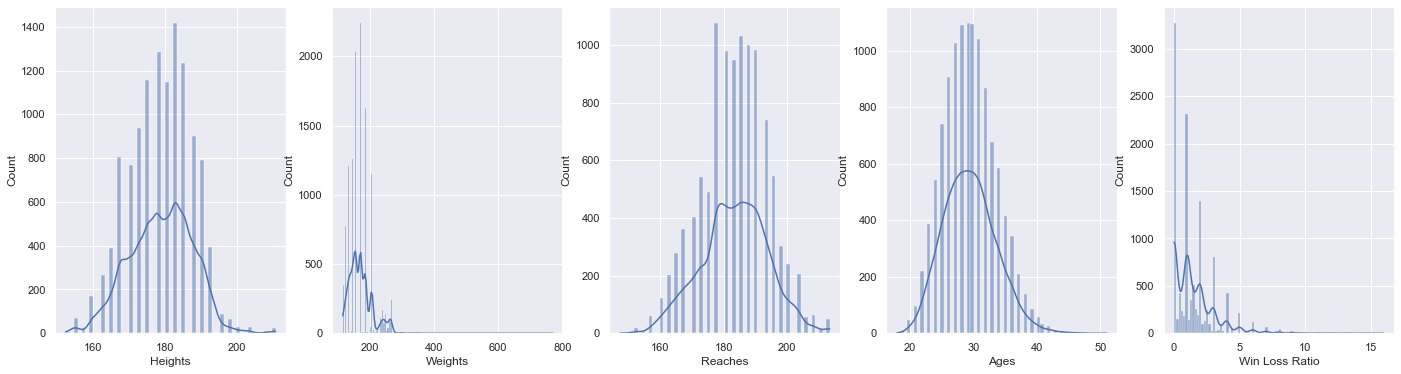

In [540]:
fig, a = plt.subplots(ncols=5, figsize=(24, 6))

sns.histplot(numerical_features["Heights"], kde=True, ax=a[0])
sns.histplot(numerical_features["Weights"], kde=True, ax=a[1])
sns.histplot(numerical_features["Reaches"], kde=True, ax=a[2])
sns.histplot(numerical_features["Ages"], kde=True, ax=a[3])
sns.histplot(numerical_features["Win Loss Ratio"], kde=True, ax=a[4])


plt.show()

We can also use a Q-Q plot to see how normally distributed the data is. The closer the data matches the 45 degree line, the more normal the distribution.

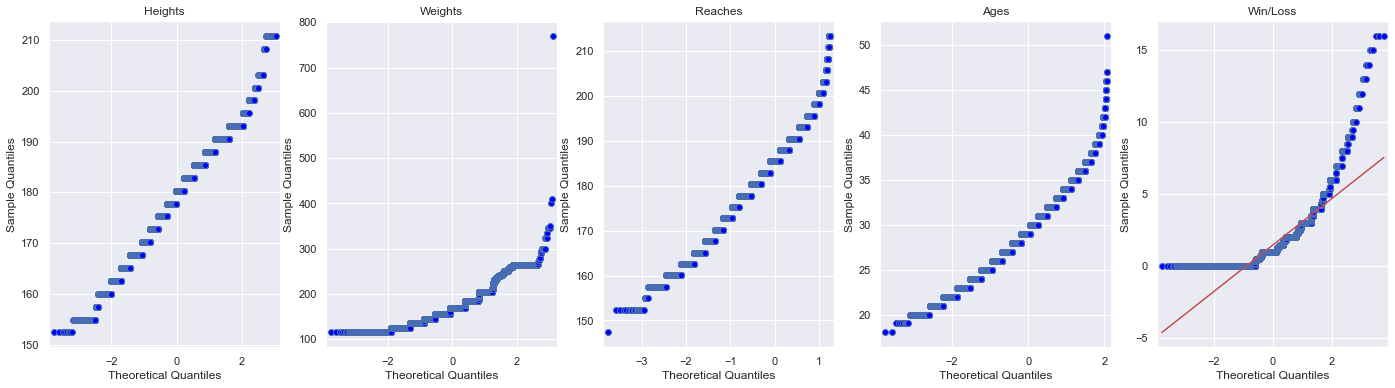

In [541]:
from scipy.stats import lognorm
import statsmodels.api as sm

fig, a = plt.subplots(ncols=5, figsize=(24, 6))

sm.qqplot(heights, line='s', ax=a[0])
sm.qqplot(weights, line='s', ax=a[1])
sm.qqplot(reaches, line='s', ax=a[2])
sm.qqplot(ages, line='s', ax=a[3])
sm.qqplot(wlr, line='s', ax=a[4])

a[0].set_title("Heights")
a[1].set_title("Weights")
a[2].set_title("Reaches")
a[3].set_title("Ages")
a[4].set_title("Win/Loss")

plt.show()

Based on the generated graphs, it seems `Heights`, `Reaches`, and `Ages` are relatively normally distributed. `Weights` on the otherhand seems to be a little skewed right. This is most likely due to the popularity and availability of lower weight classes versus higher weight classes. 

## Exploration

We can also create some scatter plots to check for any patterns. It may be general to assume that fighters who are taller, heavier, have longer reach, and are older (by a certain extent) would usually win a fight. We can create a correlation map to confirm the assumption.


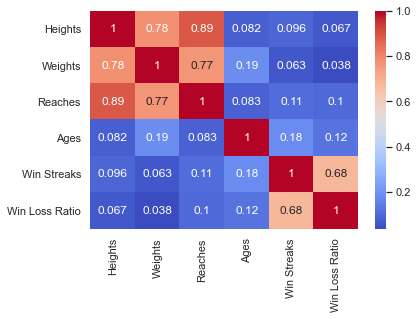

In [542]:
sns.heatmap(numerical_features.corr(), cmap='coolwarm', annot=True)
plt.show()


As we can see, `reach`, `weight`, and `height` are relatively positively correlated where `age` does not affect those variables. It can be assumed a taller person has a heavier weight and longer reach.

We will start by creating new features that represent the difference between the red and blue fighters. The new features would be the numerical column `R` - `B`

In [543]:
# df["height_diff"] = df["R_Height_cms"] - df["B_Height_cms"]
# df["weight_diff"] = df["R_Weight_lbs"] - df["B_Weight_lbs"]
# df["reach_diff"] = df["R_Reach_cms"] - df["B_Reach_cms"]
# df["age_diff"] = df["R_age"] - df["B_age"]
# df["win_streak_diff"] = df["R_current_win_streak"] - df["B_current_win_streak"]

# df.head()

In [544]:
# fig, ax = plt.subplots(2, ncols=3, figsize=(24, 12))

# sns.scatterplot(x=df["reach_diff"], y=df["height_diff"], hue=df["Winner"], ax=ax[0][0])
# sns.scatterplot(x=df["reach_diff"], y=df["weight_diff"], hue=df["Winner"], ax=ax[0][1])
# sns.scatterplot(x=df["reach_diff"], y=df["age_diff"], hue=df["Winner"], ax=ax[0][2])

# ax[0][0].set_title("reach_diff vs height_diff")
# ax[0][1].set_title("reach_diff vs weight_diff")
# ax[0][2].set_title("reach_diff vs age_diff")

# sns.scatterplot(x=df["height_diff"], y=df["weight_diff"], hue=df["Winner"], ax=ax[1][0])
# sns.scatterplot(x=df["height_diff"], y=df["age_diff"], hue=df["Winner"], ax=ax[1][1])
# sns.scatterplot(x=df["age_diff"], y=df["weight_diff"], hue=df["Winner"], ax=ax[1][2])

# ax[1][0].set_title("height_diff vs weight_diff")
# ax[1][1].set_title("height_diff vs age_diff")
# ax[1][2].set_title("age_diff vs weight_diff")

# plt.show()

The majority of the graphs seem to be randomly with a lack of correlation. There are interesting "circles" as Blue wins surround the center (0, 0) of the following graphs:
- `reach_diff vs height_diff`
- `reach_diff vs age_diff`
- `height_diff vs age_diff`

This would indicate that a larger difference in `reach`, `height`, and `age` would result in "Blue" winning which surprising.

## Preprocessing

Let's start by cleaning up some null data and selecting some desired features.

In [545]:
features = [
    "Winner",
#    "weight_class",
#    "R_Stance",
#    "B_Stance",
    "R_Height_cms",
    "B_Height_cms",
    "R_Weight_lbs",
    "B_Weight_lbs",
    "R_Reach_cms",
    "B_Reach_cms",
    "R_age", 
    "B_age",
    "R_current_win_streak",
    "R_current_lose_streak",
    "B_current_win_streak",
    "B_current_lose_streak",
    "R_wlr",
    "B_wlr",
    "R_winDiff",
    "B_winDiff"
]

orig_df = df # incase we need it again

df = df[features]
df.head()

,Winner,R_Height_cms,B_Height_cms,R_Weight_lbs,B_Weight_lbs,R_Reach_cms,B_Reach_cms,R_age,B_age,R_current_win_streak,R_current_lose_streak,B_current_win_streak,B_current_lose_streak,R_wlr,B_wlr,R_winDiff,B_winDiff
0,Red,170.18,165.10,135.0,135.0,177.80,170.18,27.0,31.0,1,0,0,1,1.000000,1.0,1,0
1,Red,182.88,187.96,185.0,205.0,187.96,193.04,28.0,32.0,2,0,2,0,2.000000,2.0,2,2
2,Red,187.96,187.96,264.0,241.0,190.50,190.50,28.0,32.0,3,0,0,0,1.333333,0.0,1,0
3,Blue,160.02,152.40,115.0,115.0,160.02,154.94,25.0,28.0,0,0,0,0,0.000000,0.0,0,0
4,Blue,167.64,180.34,135.0,135.0,172.72,182.88,43.0,29.0,2,0,3,0,0.833333,4.0,-1,3


Let's remove the entries with missing data.

In [546]:
df.isnull().sum()

Winner                     0
R_Height_cms               4
B_Height_cms              10
R_Weight_lbs               2
B_Weight_lbs               8
R_Reach_cms              406
B_Reach_cms              891
R_age                     63
B_age                    172
R_current_win_streak       0
R_current_lose_streak      0
B_current_win_streak       0
B_current_lose_streak      0
R_wlr                      0
B_wlr                      0
R_winDiff                  0
B_winDiff                  0
dtype: int64

In [547]:
# Remove entries with missing features
df = df.dropna()

df.shape

(4954, 17)

In [548]:
df.isnull().sum()

Winner                   0
R_Height_cms             0
B_Height_cms             0
R_Weight_lbs             0
B_Weight_lbs             0
R_Reach_cms              0
B_Reach_cms              0
R_age                    0
B_age                    0
R_current_win_streak     0
R_current_lose_streak    0
B_current_win_streak     0
B_current_lose_streak    0
R_wlr                    0
B_wlr                    0
R_winDiff                0
B_winDiff                0
dtype: int64

We now have 4946 entries.

In [549]:
df.head()

,Winner,R_Height_cms,B_Height_cms,R_Weight_lbs,B_Weight_lbs,R_Reach_cms,B_Reach_cms,R_age,B_age,R_current_win_streak,R_current_lose_streak,B_current_win_streak,B_current_lose_streak,R_wlr,B_wlr,R_winDiff,B_winDiff
0,Red,170.18,165.10,135.0,135.0,177.80,170.18,27.0,31.0,1,0,0,1,1.000000,1.0,1,0
1,Red,182.88,187.96,185.0,205.0,187.96,193.04,28.0,32.0,2,0,2,0,2.000000,2.0,2,2
2,Red,187.96,187.96,264.0,241.0,190.50,190.50,28.0,32.0,3,0,0,0,1.333333,0.0,1,0
3,Blue,160.02,152.40,115.0,115.0,160.02,154.94,25.0,28.0,0,0,0,0,0.000000,0.0,0,0
4,Blue,167.64,180.34,135.0,135.0,172.72,182.88,43.0,29.0,2,0,3,0,0.833333,4.0,-1,3


In [550]:
print(df)

     Winner  R_Height_cms  B_Height_cms  R_Weight_lbs  B_Weight_lbs  \
0       Red        170.18        165.10         135.0         135.0   
1       Red        182.88        187.96         185.0         205.0   
2       Red        187.96        187.96         264.0         241.0   
3      Blue        160.02        152.40         115.0         115.0   
4      Blue        167.64        180.34         135.0         135.0   
...     ...           ...           ...           ...           ...   
5768    Red        175.26        175.26         155.0         170.0   
5799    Red        190.50        180.34         205.0         205.0   
5840    Red        185.42        187.96         185.0         205.0   
5857    Red        182.88        180.34         185.0         205.0   
5884    Red        185.42        182.88         205.0         185.0   

      R_Reach_cms  B_Reach_cms  R_age  B_age  R_current_win_streak  \
0          177.80       170.18   27.0   31.0                     1   
1      

# Supervised Analysis

In [551]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# preprocessing
from sklearn.preprocessing import StandardScaler

## Logistic Regression

In [552]:
log_df = df

y = log_df.loc[:, "Winner"]
X = log_df.loc[:, log_df.columns != "Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [553]:
log_df.head()

,Winner,R_Height_cms,B_Height_cms,R_Weight_lbs,B_Weight_lbs,R_Reach_cms,B_Reach_cms,R_age,B_age,R_current_win_streak,R_current_lose_streak,B_current_win_streak,B_current_lose_streak,R_wlr,B_wlr,R_winDiff,B_winDiff
0,Red,170.18,165.10,135.0,135.0,177.80,170.18,27.0,31.0,1,0,0,1,1.000000,1.0,1,0
1,Red,182.88,187.96,185.0,205.0,187.96,193.04,28.0,32.0,2,0,2,0,2.000000,2.0,2,2
2,Red,187.96,187.96,264.0,241.0,190.50,190.50,28.0,32.0,3,0,0,0,1.333333,0.0,1,0
3,Blue,160.02,152.40,115.0,115.0,160.02,154.94,25.0,28.0,0,0,0,0,0.000000,0.0,0,0
4,Blue,167.64,180.34,135.0,135.0,172.72,182.88,43.0,29.0,2,0,3,0,0.833333,4.0,-1,3


In [554]:
logreg_model1 = LogisticRegression(penalty = "none")
print(X_train)
logreg_model1.fit(X_train, y_train)

print(f'Train Score: {logreg_model1.score(X_train, y_train)}')
print(f'Test Score: {logreg_model1.score(X_test, y_test)}')

      R_Height_cms  B_Height_cms  R_Weight_lbs  B_Weight_lbs  R_Reach_cms  \
3686        172.72        172.72         155.0         155.0       175.26   
2268        185.42        180.34         170.0         170.0       193.04   
1215        190.50        193.04         205.0         205.0       203.20   
81          182.88        172.72         155.0         155.0       190.50   
811         190.50        193.04         240.0         265.0       195.58   
...            ...           ...           ...           ...          ...   
4887        187.96        187.96         230.0         245.0       185.42   
472         162.56        172.72         135.0         135.0       162.56   
3318        177.80        177.80         155.0         155.0       177.80   
4119        182.88        182.88         170.0         170.0       190.50   
868         165.10        167.64         125.0         125.0       167.64   

      B_Reach_cms  R_age  B_age  R_current_win_streak  R_current_lose_strea

In [555]:
logreg_model2 = LogisticRegression()

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1','l2'],
    'solver': ['liblinear']
}

log_gridsearch = GridSearchCV(logreg_model2, parameters, cv=5)

log_gridsearch.fit(X_train, y_train)
log_gridsearch.best_estimator_.predict(X_test)

print(log_gridsearch.best_params_)
print(log_gridsearch.best_score_)

{'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.6209978091125632


In [556]:
logreg_model3 = LogisticRegression(
    C= 0.001,
    penalty='l2',
    solver='liblinear'
)

logreg_model3.fit(X_train, y_train)


print(f'Train Score: {logreg_model3.score(X_train, y_train)}')
print(f'Test Score: {logreg_model3.score(X_test, y_test)}')

Train Score: 0.6187231895029018
Test Score: 0.6528758829465187


## SVM

We will be using the classifier version of SVM. Typically for SVMs, the data needs to be normalized.

In [557]:
svc_df = df

scaler = StandardScaler()

features = ["height_diff", "weight_diff", "reach_diff", "age_diff"]

svc_df[features] = scaler.fit_transform(svc_df[features])

svc_df.head()

KeyError: "None of [Index(['height_diff', 'weight_diff', 'reach_diff', 'age_diff'], dtype='object')] are in the [columns]"

In [ ]:
y = svc_df.loc[:, "Winner"]
X = svc_df.loc[:, svc_df.columns != "Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svc_model1 = SVC()

svc_model1.fit(X_train, y_train)

y_pred = svc_model1.predict(X_test)

print(f'Train Score: {svc_model1.score(X_train, y_train)}')
print(f'Test Score: {svc_model1.score(X_test, y_test)}')

In [ ]:
# svc_model2 = SVC()

# parameters = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [0.001, 0.01, 0.1, 1],
#     'kernel': ['rbf'],
#     'degree': range(10)
# }

# svm_random_search = RandomizedSearchCV(svc_model2, parameters, cv=5)

# svm_random_search.fit(X_train, y_train)

# print(svm_random_search.best_params_)
# print(svm_random_search.best_score_)

In [ ]:
# svc_model3 = svm_random_search.best_estimator_

svc_model3 = SVC(
    kernel='rbf',
    gamma=0.1,
    degree=8,
    C=1
)

svc_model3.fit(X_train, y_train)

print(f'Train Score: {svc_model3.score(X_train, y_train)}')
print(f'Test Score: {svc_model3.score(X_test, y_test)}')

## Neural Networks

In [ ]:
nn_df = df

scaler = StandardScaler()

features = ["height_diff", "weight_diff", "reach_diff", "age_diff"]

nn_df[features] = scaler.fit_transform(nn_df[features])

nn_df.head()

In [ ]:
y = nn_df.loc[:, "Winner"]
X = nn_df.loc[:, nn_df.columns != "Winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
mlp_model1 = MLPClassifier(hidden_layer_sizes=(100,))

mlp_model1.fit(X_train, y_train)

print(f'Train Score: {mlp_model1.score(X_train, y_train)}')
print(f'Test Score: {mlp_model1.score(X_test, y_test)}')

In [ ]:
# mlp_model2 = MLPClassifier()

# parameters = {
#     'hidden_layer_sizes': [(10,), (20,), (50,), (100,)],
#     'activation': ['relu', 'tanh', 'logistic'],
#     'solver': ['adam', 'lbfgs', 'sgd'],
#     'alpha': [0.001, 0.01, 0.1, 1, 10]
# }

# nn_random_search = RandomizedSearchCV(mlp_model2, parameters, cv=5)

# nn_random_search.fit(X_train, y_train)

# print(nn_random_search.best_params_)
# print(nn_random_search.best_score_)

In [ ]:
# mlp_model3 = nn_random_search.best_estimator_

mlp_model3 = MLPClassifier(
    solver='adam',
    hidden_layer_sizes=(100,),
    alpha=0.001,
    activation='tanh'
)

mlp_model3.fit(X_train, y_train)

print(f'Train Score: {mlp_model3.score(X_train, y_train)}')
print(f'Test Score: {mlp_model3.score(X_test, y_test)}')